![imag_name](https://machinelearninggeek.com/wp-content/uploads/2020/10/image-58.png)
1. **Core Point**:
   - A data point is considered a core point if it has at least `MinPts` (a user-defined minimum number of data points) within its ε-neighborhood, including itself.
   - In other words, a core point is at the center of a dense region in the dataset.

2. **Border Point (or Border/Core Point)**:
   - A data point is classified as a border point if it is not a core point but lies within the ε-neighborhood of a core point.
   - Border points are part of a cluster but are not at the center of the cluster.

3. **Noise Point (or Outlier)**:
   - A data point is labeled as a noise point if it is neither a core point nor a border point.
   - Noise points do not belong to any cluster and are often considered outliers.

Now, let's clarify the role of the epsilon (ε) parameter:

- **Epsilon (ε)**:
   - Epsilon defines the radius around a data point within which other data points are considered neighbors.
   - It is a user-defined parameter and is crucial for determining the size and shape of clusters.
   - If ε is set too small, many points may be classified as noise because they don't have enough neighbors within their ε-neighborhood.
   - If ε is set too large, clusters may merge, and the algorithm may identify a single large cluster or classify too many points as border points.

- **Core points** are the central points in dense regions and are the foundation of clusters.
- **Border points** are on the edges of clusters, connecting core points. They are included in clusters but are not as central as core points.
- **Noise points** are isolated points that don't belong to any cluster.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('./Datasets/exp_5.csv')

In [4]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
51,52,Male,33,42,60
103,104,Male,26,62,55
89,90,Female,50,58,46
160,161,Female,56,79,35
58,59,Female,27,46,51


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


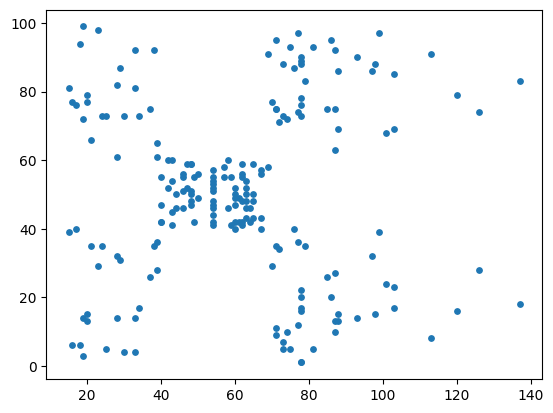

In [7]:
plt.scatter(df.iloc[:,3],df.iloc[:,4],s=15)
plt.show()

[-1  0  1  2  3  4]


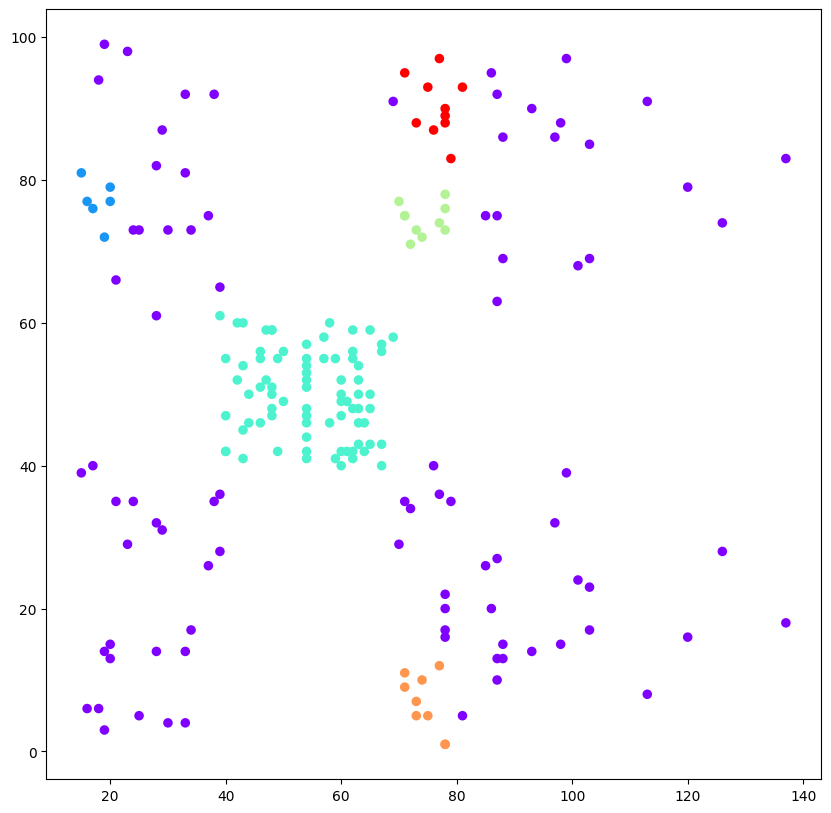

In [24]:
dbscan = DBSCAN(eps=5,min_samples=5)
classes = dbscan.fit_predict(df.iloc[:,3:5].values)
print(np.unique(classes))
plt.figure(figsize=(10,10))
plt.scatter(df.iloc[:,3],df.iloc[:,4],s=15,c=classes,cmap='rainbow',linewidths=3)
plt.show()